In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
fish_data =np.column_stack((fish_length,fish_weight))

In [4]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [5]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

In [6]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,
                                                                 fish_target,
                                                                 random_state=42
                                                                )

In [9]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,
                                                                 fish_target,
                                                                 stratify=fish_target,
                                                                 random_state=42
                                                                )

In [10]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [12]:
kn.predict([[25,150]])

array([0.])

In [13]:
import matplotlib.pyplot as plt

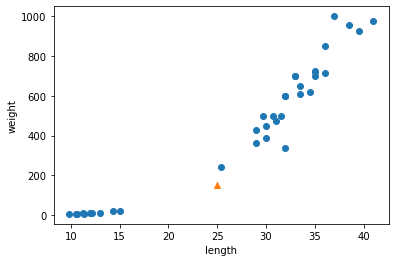

In [14]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
# 이웃과의 거리, 인덱스번호
dist, idx =kn.kneighbors([[25,150]])

In [16]:
train_input[idx]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

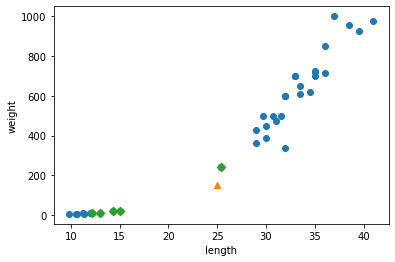

In [17]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[idx,0],
            train_input[idx,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
mean = np.mean(train_input,axis=0)

In [20]:
std = np.std(train_input,axis=0)

In [21]:
train_scaled = ((train_input-mean)/std)
print(train_scaled[:10])

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]]


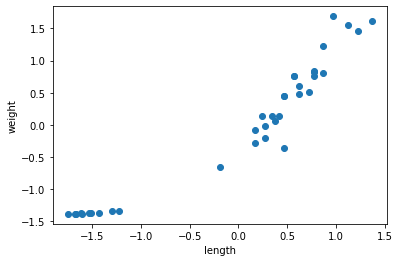

In [22]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
new=([25,150]-mean)/std

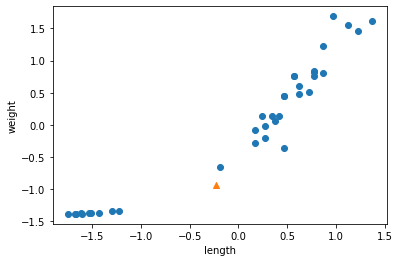

In [24]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [26]:
test_scaled = (test_input-mean)/std

In [27]:
kn.score(test_scaled,test_target)

1.0

In [28]:
kn.predict([new])

array([1.])

In [29]:
dist, idx =kn.kneighbors([new])

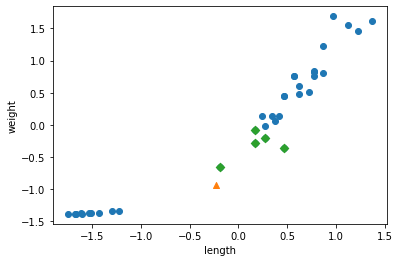

In [31]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[idx,0],
            train_scaled[idx,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()